# 1. 疫情初步分析，筛选相关性强的特征

通过官方公布的日频疫情数据、各地区（全国各省、直辖市、港澳台，去掉疫情严重的湖北和武汉）的历史天气、人口、GDP、距离武汉公里数等数据，筛选和确诊人数相关性强的特征。

所有数据都有各省、直辖市、港澳台、以及武汉，省的天气数据统计的是所在省会城市的数据。

## 1.1. 现有特征数据展示

In [2]:
from coronavirus_analyzer import CoronavirusAnalyzer
# 初始化分析类
analyzer = CoronavirusAnalyzer()

In [3]:
# 地区相互距离矩阵
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 8)
print(analyzer.df_distance.index.tolist())
analyzer.df_distance

['北京', '上海', '天津', '重庆', '黑龙江', '吉林', '辽宁', '内蒙古', '河北', '山西', '山东', '河南', '陕西', '甘肃', '宁夏', '青海', '新疆', '安徽', '江苏', '浙江', '湖南', '江西', '湖北', '四川', '贵州', '福建', '台湾', '广东', '海南', '广西', '云南', '西藏', '香港', '澳门', '武汉']


,北京,上海,天津,重庆,...,西藏,香港,澳门,武汉
北京,0.000000,1063.211982,103.589069,1464.353444,...,2566.591142,1963.500780,1979.971010,1047.708830
上海,1063.211982,0.000000,961.335849,1448.054847,...,2907.958210,1227.709844,1272.272492,685.093039
...,...,...,...,...,...,...,...,...,...
澳门,1979.971010,1272.272492,1908.890967,1072.535924,...,2384.032442,64.228639,0.000000,934.088338
武汉,1047.708830,685.093039,981.317616,762.974248,...,2232.235661,921.636262,934.088338,0.000000


In [4]:
# 地区信息
import pandas as pd
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 12)
analyzer.df_info

,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉
地区,,,,,,,,,,,
全国,1.395380e+09,9.003000e+13,64520.059052,54776300.0,0.0000,964.998822,NaN,NaN,NaN,NaN,NaN
广东,1.134600e+08,9.727777e+12,85737.502203,590000.0,0.0052,17.970000,1583.818086,6.6,23.133333,113.250000,836.326981
...,...,...,...,...,...,...,...,...,...,...,...
西藏,3.371500e+06,1.477630e+11,43827.079935,0.0,0.0000,122.840000,364348.212962,3658.0,29.666667,91.166667,2232.235661
澳门,6.320000e+05,3.609000e+11,571044.303797,0.0,0.0000,0.002540,40.189873,19.0,22.216667,113.550000,934.088338


In [5]:
# 历史天气文字转数值
from weather_crawler import WeatherCrawler
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

weather_crawler = WeatherCrawler()
weather_crawler.weather_info

,晴,多云,阴,雾,大雾,霾,中度霾,重度霾,阵雨,小雨,小到中雨,中雨,中到大雨,大雨,雨夹雪,阵雪,小雪,小到中雪,中雪,中到大雪,大雪
晴朗度,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
雾度,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
霾度,0,0,0,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0
降雨量,0,0,0,0,0,0,0,0,1,2,3,4,5,6,3,0,0,0,0,0,0
降雪量,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,3,4,5,6


In [6]:
# 历史天气（包括所有原始数据和天气文字转数值的数据，目前没有使用风向）
import pandas as pd
pd.set_option('display.max_columns', 40)
analyzer.df_weather.tail(2)

武汉                                                           \
           上午天气 下午天气 上午温度 下午温度  风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                         
2020-01-26  雨夹雪    阴    3    1  北风    4    5     0    0    0     3     3   
2020-01-27    阴    晴    6   -1  北风    3    4     1    0    0     0     0   

                                         上海            ...   湖南              \
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量 上午天气 下午天气 上午温度  ... 下午霾度 下午降雨量 下午降雪量   
日期                                                     ...                    
2020-01-26     1    0    0     0     0   中雨   小雨   10  ...    0     0     0   
2020-01-27     3    0    0     0     0   小雨   小雨    8  ...    0     0     0   

             香港                                                              \
           上午天气 下午天气 上午温度 下午温度     风向 最低风速 最高风速 上午晴朗度 上午雾度 上午霾度 上午降雨量 上午降雪量   
日期                                                                            
2020-01-26   中雨   多云   19   14  无持续风向    1    2     0    0    0     4     0   
2020-01-27   多云   多云   17   11  无持续风向    1    2     2    0    0     0     0   

                                        
           下午晴朗度 下午雾度 下午霾度 下午降雨量 下午降雪量  
日期                                      
2020-01-26     2    0    0     0     0  
2020-01-27     2    0    0     0     0  

[2 rows x 595 columns]

In [7]:
# 历史天气平均数据
analyzer.df_weather_average.head()

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,...,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量
地区,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
上海,14.111111,14.794702,5.277778,5.523179,7.055556,7.397351,4.555556,4.165563,2.777778,2.582781,2.277778,2.082781,1.388889,1.377483,0.722222,0.735099,0.694444,0.688742,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.555556,2.582781,1.222222,1.152318,1.277778,1.291391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
云南,21.588235,21.706767,3.176471,3.105263,10.794118,10.853383,6.882353,7.240602,3.941176,4.120301,3.441176,3.620301,5.411765,5.293233,2.647059,2.571429,2.705882,2.646617,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529412,0.631579,0.352941,0.428571,0.264706,0.315789,0.529412,0.631579,0.352941,0.428571,0.264706,0.315789
内蒙古,-20.800000,-19.330000,-15.666667,-14.990000,-10.400000,-9.665000,4.333333,4.400000,2.666667,2.700000,2.166667,2.200000,5.066667,5.220000,2.533333,2.620000,2.533333,2.610000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.280000,0.133333,0.120000,0.133333,0.140000
北京,-2.111111,-1.741722,-6.111111,-5.980132,-1.055556,-0.870861,3.444444,3.476821,2.222222,2.238411,1.722222,1.738411,5.333333,5.443709,2.666667,2.748344,2.666667,2.721854,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
台湾,34.500000,34.463576,15.555556,15.715232,17.250000,17.231788,7.333333,6.774834,4.166667,3.887417,3.666667,3.387417,2.166667,2.357616,1.222222,1.337748,1.083333,1.178808,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.444444,1.205298,0.777778,0.675497,0.722222,0.602649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 1.2. 实时疫情数据展示

In [8]:
# 实时累计疫情数据
analyzer.df_virus.tail(2)

全国                     武汉                    湖北           \
                 是否更新   死亡  治愈 疑似    确诊 是否更新  死亡  治愈 疑似    确诊 是否更新   死亡  治愈   
2020-01-28 13:50    1  106  62  0  4547    0  85  42  0  1590    0  100  47   
           13:58    0  106  62  0  4547    0  85  42  0  1590    0  100  47   

                            广东                ...   香港               澳门        \
                 疑似    确诊 是否更新 死亡 治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈   
2020-01-28 13:50  0  2714    0  0  4  0  188  ...    0  0  0  0  8    0  0  0   
           13:58  0  2714    0  0  4  0  188  ...    0  0  0  0  8    0  0  0   

                         青海               台湾              
                 疑似 确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-01-28 13:50  0  7    0  0  0  0  6    0  0  0  0  5  
           13:58  0  7    0  0  0  0  6    0  0  0  0  5  

[2 rows x 175 columns]

In [9]:
# 日频累计疫情数据（取各地区每日第一条更新的数据）
analyzer.df_virus_daily.tail(2)

全国                       武汉                        湖北        \
              死亡    治愈   疑似      确诊    死亡    治愈   疑似      确诊     死亡    治愈   
日期                                                                          
2020-01-27  56.0  49.0  0.0  2079.0  63.0  42.0  0.0   698.0   76.0  44.0   
2020-01-28  82.0  55.0  0.0  2882.0  85.0  42.0  0.0  1590.0  100.0  47.0   

                          广东                    浙江                   ...   吉林  \
             疑似      确诊   死亡   治愈   疑似     确诊   死亡   治愈   疑似     确诊  ...   死亡   
日期                                                                   ...        
2020-01-27  0.0  1423.0  0.0  2.0  0.0  146.0  0.0  1.0  0.0  128.0  ...  0.0   
2020-01-28  0.0  2714.0  0.0  4.0  0.0  151.0  0.0  1.0  0.0  173.0  ...  0.0   

                            香港                  澳门                  青海       \
             治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   
日期                                                                            
2020-01-27  0.0  0.0  6.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  6.0  0.0  0.0   
2020-01-28  0.0  0.0  8.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  7.0  0.0  0.0   

                       台湾                 
             疑似   确诊   死亡   治愈   疑似   确诊  
日期                                        
2020-01-27  0.0  4.0  0.0  0.0  0.0  5.0  
2020-01-28  0.0  6.0  0.0  0.0  0.0  5.0  

[2 rows x 140 columns]

In [10]:
# 日频增量疫情数据（每日第一条更新的累计数据和上一日第一条更新的累计数据差）
analyzer.df_virus_daily_inc.tail(2)

全国                       武汉                     湖北             \
              死亡    治愈    疑似     确诊    死亡   治愈   疑似     确诊    死亡    治愈   疑似   
日期                                                                            
2020-01-27  14.0  10.0 -20.0  671.0  18.0  2.0  0.0   80.0  36.0  12.0  0.0   
2020-01-28  26.0   6.0   0.0  803.0  22.0  0.0  0.0  892.0  24.0   3.0  0.0   

                     广东                   浙江                  ...   吉林       \
                确诊   死亡   治愈   疑似    确诊   死亡   治愈   疑似    确诊  ...   死亡   治愈   
日期                                                            ...             
2020-01-27   662.0  0.0  0.0  0.0  48.0  0.0  0.0  0.0  24.0  ...  0.0  0.0   
2020-01-28  1291.0  0.0  2.0  0.0   5.0  0.0  0.0  0.0  45.0  ...  0.0  0.0   

                       香港                  澳门                  青海            \
             疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   确诊   死亡   治愈   疑似   
日期                                                                            
2020-01-27  0.0  2.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2020-01-28  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

                  台湾                 
             确诊   死亡   治愈   疑似   确诊  
日期                                   
2020-01-27  3.0  0.0  0.0  0.0  1.0  
2020-01-28  2.0  0.0  0.0  0.0  0.0  

[2 rows x 140 columns]

## 1.3. 将各地确诊人数作为目标值，作为特征筛选的依据

In [11]:
# 取最新一条实时累计疫情数据，作为特征筛选的依据
recent_virus = analyzer.df_virus.iloc[-1]
pd.DataFrame(recent_virus).T

全国                     武汉                    湖北           \
                 是否更新   死亡  治愈 疑似    确诊 是否更新  死亡  治愈 疑似    确诊 是否更新   死亡  治愈   
2020-01-28 13:58    0  106  62  0  4547    0  85  42  0  1590    0  100  47   

                            广东                ...   香港               澳门        \
                 疑似    确诊 是否更新 死亡 治愈 疑似   确诊  ... 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈   
2020-01-28 13:58  0  2714    0  0  4  0  188  ...    0  0  0  0  8    0  0  0   

                         青海               台湾              
                 疑似 确诊 是否更新 死亡 治愈 疑似 确诊 是否更新 死亡 治愈 疑似 确诊  
2020-01-28 13:58  0  7    0  0  0  0  6    0  0  0  0  5  

[1 rows x 175 columns]

In [12]:
import pandas as pd
# 取最新一条实时累计疫情数据中的确诊人数
index = [_[0] for _ in recent_virus.index[::5]]
s_virus = pd.Series(recent_virus.values[4::5], index=index)
s_virus.name = '确诊'
pd.DataFrame(s_virus).T

,全国,武汉,湖北,广东,浙江,河南,湖南,重庆,安徽,四川,山东,北京,福建,江西,江苏,上海,广西,海南,陕西,河北,黑龙江,辽宁,云南,天津,山西,甘肃,内蒙古,宁夏,新疆,贵州,吉林,香港,澳门,青海,台湾
确诊,4547,1590,2714,188,173,168,143,132,106,90,87,80,73,72,70,66,51,40,35,33,30,30,26,24,20,19,13,11,10,9,8,8,7,6,5


## 1.4. 构造、合并特征数据和分析目标

去掉湖北、武汉数据，避免对分析造成影响

In [13]:
# 合并地区信息、疫情 DataFrame
df = pd.concat([analyzer.df_info, s_virus], axis=1, sort=False)
# 去掉全国、以及疫情严重的湖北、武汉，增加确诊人口占比列
index = df.index.tolist()
index.remove('全国')
df = df.loc[index]
# 再合并入天气平均数据
df = pd.concat([analyzer.df_weather_average, df], axis=1, sort=False)
df['确诊'].fillna(0, inplace=True)
# 去掉疫情严重的湖北、武汉
index = df.index.tolist()
index.remove('湖北')
index.remove('武汉')
df = df.loc[index]

pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 100)
df

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,14.111111,14.794702,5.277778,5.523179,7.055556,7.397351,4.555556,4.165563,2.777778,2.582781,2.277778,2.082781,1.388889,1.377483,0.722222,0.735099,0.694444,0.688742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.555556,2.582781,1.222222,1.152318,1.277778,1.291391,0.000,0.000000,0.000,0.000000,0.0000,0.00000,24237800.0,3.267987e+12,134830.182607,9726900.0,0.401311,0.63,259.924581,4.5,31.233333,121.483333,685.093039,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-35.437500,-34.672414,-24.062500,-23.750000,-17.718750,-17.336207,3.625000,3.827586,2.312500,2.413793,1.812500,1.913793,4.625000,4.379310,2.437500,2.370690,2.312500,2.189655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.508621,0.125,0.155172,0.1875,0.25431,37887000.0,1.636162e+12,43185.314224,500000.0,0.013197,45.48,12004.117507,171.7,45.750000,126.683333,1992.035603,30.0


## 1.5. 归一化数据

避免特征值本身大小影响分析

In [14]:
# 正态分布归一化数据
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
arr = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(arr, index=df.index, columns=df.columns)
df_standard

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经,距离武汉,确诊
上海,0.371134,0.382418,0.529070,0.537170,0.371134,0.382418,0.528207,0.103295,0.528207,0.103295,0.528207,0.103295,-1.408135,-1.381684,-1.391846,-1.329239,-1.408135,-1.381684,-0.254265,-0.254578,-0.221354,-0.182645,-0.254265,-0.254578,-0.261441,-0.269433,-0.268815,-0.276747,-0.261441,-0.269433,1.568501,1.514556,1.459481,1.230416,1.568501,1.514556,-0.673060,-0.698213,-0.610076,-0.615592,-0.673060,-0.698213,-0.586047,0.178044,0.432847,3.711245,3.496561,-0.740493,-0.328960,-0.614836,-0.182266,1.064326,-0.618744,0.196232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江,-2.204245,-2.251062,-2.212888,-2.246944,-2.204245,-2.251062,-0.378224,-0.227721,-0.378224,-0.227721,-0.378224,-0.227721,1.011271,0.812711,1.189145,1.055378,1.011271,0.812711,-0.254265,-0.254578,-0.221354,-0.182645,-0.254265,-0.254578,-0.261441,-0.269433,-0.268815,-0.276747,-0.261441,-0.269433,-0.859356,-0.846550,-0.886684,-0.873004,-0.859356,-0.846550,0.586538,1.090230,0.230674,0.398587,0.586538,1.090230,-0.119861,-0.524437,-0.478386,-0.488334,-0.381332,0.443544,-0.148337,-0.408308,1.881907,1.665539,1.800286,-0.479490


## 1.6. 计算特征和目标的相关性

In [15]:
# 计算各种因子和“确诊”、“确诊占比”的相关性
corr = df_standard.corr().iloc[-2:, :-2]
corr

,平均上午温度,加权平均上午温度,平均下午温度,加权平均下午温度,平均日均温度,加权平均日均温度,平均最低风速,加权平均最低风速,平均最高风速,加权平均最高风速,平均日均风速,加权平均日均风速,平均上午晴朗度,加权平均上午晴朗度,平均下午晴朗度,加权平均下午晴朗度,平均日均晴朗度,加权平均日均晴朗度,平均上午雾度,加权平均上午雾度,平均下午雾度,加权平均下午雾度,平均日均雾度,加权平均日均雾度,平均上午霾度,加权平均上午霾度,平均下午霾度,加权平均下午霾度,平均日均霾度,加权平均日均霾度,平均上午降雨量,加权平均上午降雨量,平均下午降雨量,加权平均下午降雨量,平均日均降雨量,加权平均日均降雨量,平均上午降雪量,加权平均上午降雪量,平均下午降雪量,加权平均下午降雪量,平均日均降雪量,加权平均日均降雪量,人口,GDP,人均GDP,流动人口,流动人口占比,面积,人均面积,海拔,北纬,东经
距离武汉,-0.448766,-0.452722,-0.485210,-0.486235,-0.448766,-0.452722,-0.098988,-0.039085,-0.098988,-0.039085,-0.098988,-0.039085,0.490207,0.494124,0.460115,0.450761,0.490207,0.494124,0.518719,0.526255,0.535933,0.570982,0.518719,0.526255,0.111598,0.105821,0.105821,0.098767,0.111598,0.105821,-0.598604,-0.588567,-0.587310,-0.585521,-0.598604,-0.588567,0.090731,0.156099,0.088068,0.099317,0.090731,0.156099,-0.441213,-0.465787,-0.117590,-0.175418,-0.062512,0.699708,0.530856,0.510798,0.407858,-0.442253
确诊,0.262295,0.267362,0.297049,0.301454,0.262295,0.267362,-0.001710,-0.008054,-0.001710,-0.008054,-0.001710,-0.008054,-0.481807,-0.474379,-0.479041,-0.468471,-0.481807,-0.474379,-0.184546,-0.186671,-0.167515,-0.153645,-0.184546,-0.186671,-0.127330,-0.131620,-0.131076,-0.135080,-0.127330,-0.131620,0.504021,0.495126,0.541556,0.534400,0.504021,0.495126,-0.017431,-0.091327,0.016980,-0.045047,-0.017431,-0.091327,0.716270,0.671404,-0.160221,0.242841,0.052601,-0.295058,-0.283892,-0.425253,-0.220128,0.223798


In [16]:
# 各特征与确诊人数的相关性
corr_injured = corr.loc['确诊']
corr_injured

pd.set_option('display.max_columns', 100)
sorted_index = corr_injured.abs().sort_values(ascending=False).index
selected_factor_set = set()
selected_factors = []
for idx in sorted_index:
    if idx.startswith('加权') or idx.startswith('人均'):
        idx_in_set = idx[2:]
    elif idx.endswith('占比'):
        idx_in_set = idx[:-2]
    else:
        idx_in_set = idx
    if idx_in_set not in selected_factor_set:
        selected_factor_set.add(idx_in_set)
        selected_factors.append(idx)
corr_injured_sum = corr_injured[selected_factors].abs().sum()
selected_target = '确诊'
print('与“{}”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：{}。'.format(selected_target, selected_factors))
pd.DataFrame([corr_injured])[sorted_index]

与“确诊”相关性从大到小的指标依次为（忽略相关性较弱的相似指标）：['人口', 'GDP', '平均下午降雨量', '平均上午降雨量', '平均日均降雨量', '平均上午晴朗度', '平均日均晴朗度', '平均下午晴朗度', '海拔', '加权平均下午温度', '面积', '加权平均日均温度', '加权平均上午温度', '流动人口', '东经', '北纬', '加权平均日均雾度', '加权平均上午雾度', '平均下午雾度', '加权平均下午霾度', '加权平均上午霾度', '加权平均日均霾度', '加权平均日均降雪量', '加权平均上午降雪量', '加权平均下午降雪量', '加权平均最高风速', '加权平均日均风速', '加权平均最低风速']。


,人口,GDP,平均下午降雨量,加权平均下午降雨量,平均上午降雨量,平均日均降雨量,加权平均上午降雨量,加权平均日均降雨量,平均上午晴朗度,平均日均晴朗度,平均下午晴朗度,加权平均日均晴朗度,加权平均上午晴朗度,加权平均下午晴朗度,海拔,加权平均下午温度,平均下午温度,面积,人均面积,加权平均日均温度,加权平均上午温度,平均日均温度,平均上午温度,流动人口,东经,北纬,加权平均日均雾度,加权平均上午雾度,平均日均雾度,平均上午雾度,平均下午雾度,人均GDP,加权平均下午雾度,加权平均下午霾度,加权平均上午霾度,加权平均日均霾度,平均下午霾度,平均日均霾度,平均上午霾度,加权平均日均降雪量,加权平均上午降雪量,流动人口占比,加权平均下午降雪量,平均上午降雪量,平均日均降雪量,平均下午降雪量,加权平均最高风速,加权平均日均风速,加权平均最低风速,平均日均风速,平均最低风速,平均最高风速
确诊,0.71627,0.671404,0.541556,0.5344,0.504021,0.504021,0.495126,0.495126,-0.481807,-0.481807,-0.479041,-0.474379,-0.474379,-0.468471,-0.425253,0.301454,0.297049,-0.295058,-0.283892,0.267362,0.267362,0.262295,0.262295,0.242841,0.223798,-0.220128,-0.186671,-0.186671,-0.184546,-0.184546,-0.167515,-0.160221,-0.153645,-0.13508,-0.13162,-0.13162,-0.131076,-0.12733,-0.12733,-0.091327,-0.091327,0.052601,-0.045047,-0.017431,-0.017431,0.01698,-0.008054,-0.008054,-0.008054,-0.00171,-0.00171,-0.00171


## 1.7. 对选定的特征数据之间的相关性进行分析，进一步筛选特征数据

先查看特征之间的相关性。

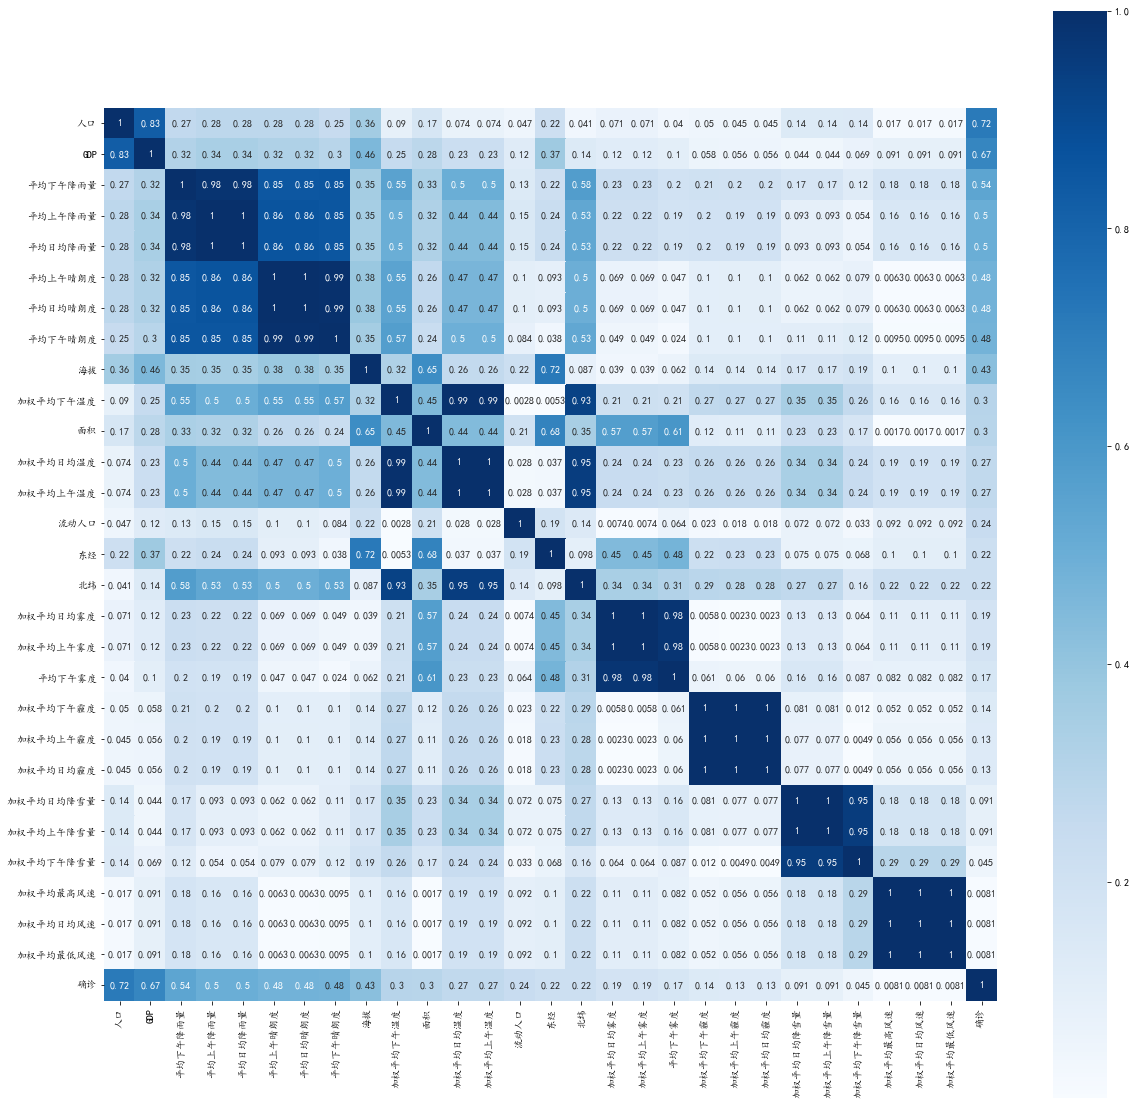

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

df_region_info_weather = df_standard[selected_factors + [selected_target]]
df_corr = df_region_info_weather.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

如上图，将相互强相关的特征数据，取其中一个：对“上午”、“下午”、“最高”、“最低”、“日均”取“日均”。如下图。

再次筛选后的特征和目标：人口、GDP、平均日均降雨量、平均日均晴朗度、海拔、面积、加权平均日均温度、流动人口、东经、北纬、加权平均日均雾度、加权平均日均霾度、加权平均日均降雪量、加权平均日均风速、确诊


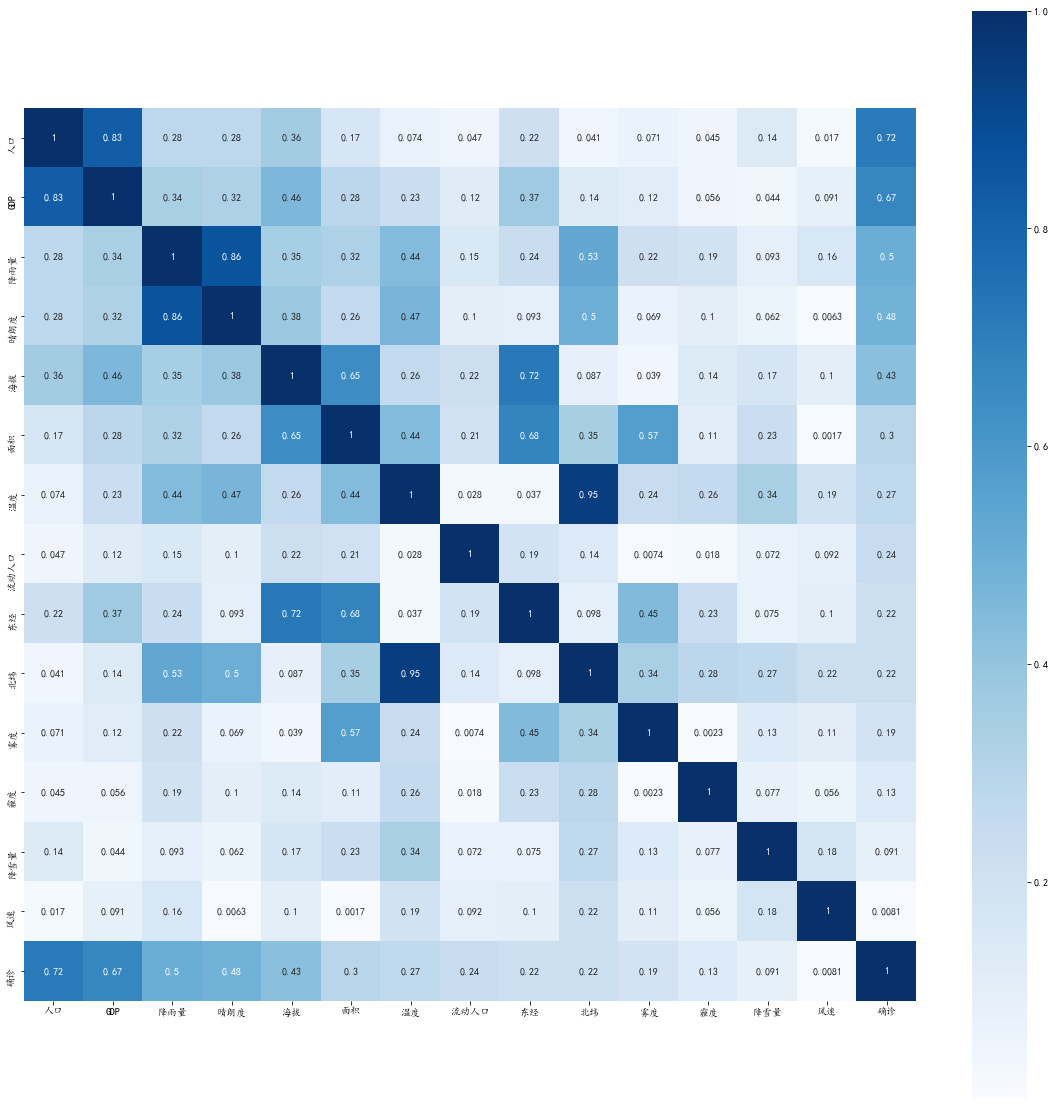

In [18]:
selected_cols = []
selected_col_short_names = []  # 后续对特征使用缩写的名称
for col in df_region_info_weather.columns:
    if '平均' in col:
        name = col.replace('加权', '').replace('上午', '').replace('下午', '').replace('最高', '')\
               .replace('最低', '').replace('日均', '')
        if '日均' in col:
            selected_cols.append(col)
            selected_col_short_names.append(name.replace('平均', ''))
    else:
        selected_cols.append(col)
        selected_col_short_names.append(col)
print('再次筛选后的特征和目标：{}'.format('、'.join(selected_cols)))
df_selected = df_region_info_weather[selected_cols]
df_selected.columns = selected_col_short_names
df_corr = df_selected.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr.abs(), annot=True, vmax=1, square=True, cmap="Blues")

In [19]:
df_corr.iloc[-1:, :-1]

,人口,GDP,降雨量,晴朗度,海拔,面积,温度,流动人口,东经,北纬,雾度,霾度,降雪量,风速
确诊,0.71627,0.671404,0.504021,-0.481807,-0.425253,-0.295058,0.267362,0.242841,0.223798,-0.220128,-0.186671,-0.13162,-0.091327,-0.008054


## 1.8. 相关性分析结论

In [20]:
corr_analysis = df_corr.iloc[-1:, :-1].T
corr_analysis.columns = ['和确诊的相关性（绝对值越大表示越相关）']
corr_info_dict = {
    '人口': ('人口越多的地区，越容易感染', '人口越少的地区，越容易感染'),
    'GDP': ('GDP 越高的地区，越容易感染', 'GDP 越低的地区，越容易感染'),
    '降雨量': ('降雨量越多的地区，越容易感染', '降雨量越少的地区，越容易感染'),
    '晴朗度': ('天越晴的地区，越容易感染', '天越阴的地区，越容易感染'),
    '海拔': ('海拔越高的地区，越容易感染', '海拔越低的地区，越容易感染'),
    '面积': ('面积越大的地区，越容易感染', '面积越小的地区，越容易感染'),
    '温度': ('温度越高的地区，越容易感染', '温度越低的地区，越容易感染'),
    '流动人口': ('流动人口越高的地区，越容易感染', '流动人口越低的地区，越容易感染'),
    '东经': ('越东方的地区，越容易感染', '越北方的地区，越容易感染'),
    '北纬': ('越北方的地区，越容易感染', '越南方的地区，越容易感染'),
    '雾度': ('雾越多的地区，越容易感染', '雾越少的地区，越容易感染'),
    '霾度': ('霾越多的地区，越容易感染', '霾越少的地区，越容易感染'),
    '降雪量': ('降雪量越多的地区，越容易感染', '降雪量越少的地区，越容易感染'),
    '风速': ('风速越高的地区，越容易感染', '风速越低的地区，越容易感染'),
}
desc = []
for name, val in zip(corr_analysis.index, corr_analysis.values.reshape(-1)):
    if abs(val) > 0.1:
        if val > 0:
            desc.append(corr_info_dict[name][0])
        else:
            desc.append(corr_info_dict[name][1])
    else:
        desc.append('该因素几乎没有影响')
corr_analysis['新冠状病毒影响因素分析（影响力从高到低排序）'] = desc
pd.set_option('display.max_rows', 30)
corr_analysis.iloc[:, [-1]]

,新冠状病毒影响因素分析（影响力从高到低排序）
人口,人口越多的地区，越容易感染
GDP,GDP 越高的地区，越容易感染
降雨量,降雨量越多的地区，越容易感染
晴朗度,天越阴的地区，越容易感染
海拔,海拔越低的地区，越容易感染
面积,面积越小的地区，越容易感染
温度,温度越高的地区，越容易感染
流动人口,流动人口越高的地区，越容易感染
东经,越东方的地区，越容易感染
北纬,越南方的地区，越容易感染
